In [149]:
import pandas as pd

In [150]:
df=pd.read_csv("ml_df.csv")

In [151]:
df

,translated_text_no_emoji,emoji_labels
0,After a long time there was a breath of relief,[0]
1,I was able to reduce smoking!,[0]
2,Good morning friends. . . . . . Have a nice day,[]
3,Fun all night online. . .,[0]
4,Road to Sylhet Stadium… Really how beautiful...,[0]
...,...,...
929,"Haha, lol hope Atit keeps up the series http/...","[0, 3]"
930,Hahaha..... What do the bulls say... 60 hours ...,[0]
931,HAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHA...,[]
932,As many incidents of vandalism happen during t...,[2]


In [152]:
import warnings
warnings.filterwarnings("ignore")

In [153]:
df['emoji_labels'][929][1]

'0'

In [154]:
df['emoji_labels'].value_counts()

emoji_labels
[2]                   306
[0]                   177
[]                    162
[0, 3]                 71
[2, 3]                 64
[3]                    62
[0, 0]                 18
[2, 2]                 10
[1]                     7
[0, 0, 3]               7
[1, 3]                  6
[2, 2, 3]               5
[0, 1]                  4
[0, 0, 0]               3
[1, 0]                  2
[1, 0, 3]               2
[0, 2]                  2
[0, 2, 2]               2
[2, 2, 2]               2
[0, 0, 0, 3]            1
[7]                     1
[5, 3]                  1
[1, 1]                  1
[2, 3, 3]               1
[3, 2, 2]               1
[6, 2]                  1
[0, 1, 3]               1
[0, 3, 2]               1
[9, 3]                  1
[0, 0, 0, 0]            1
[0, 8]                  1
[1, 7, 3]               1
[0, 0, 3, 3]            1
[0, 0, 0, 0, 2, 0]      1
[6]                     1
[5]                     1
[0, 5]                  1
[0, 4]                  1

In [155]:
predict_df= df[df['emoji_labels'].str.len() <= 2]

In [156]:
predict_df.drop('emoji_labels',axis=1,inplace=True)

In [157]:
predict_df.reset_index(drop=True, inplace=True)

In [158]:
predict_df

,translated_text_no_emoji
0,Good morning friends. . . . . . Have a nice day
1,Aha!! What a peaceful sleep!!! # Sir Wooden El...
2,feeling Dil Khosh
3,"just amazing Lagtes... story is not fact, acti..."
4,Willpower can break all obstacles!
...,...
157,"My mind became green, fresh and relaxed like t..."
158,Happy Vijaya Dashmi with love and sincere cong...
159,Good wishes Good Night!
160,Hasina Khaleda do not live in the net! feeling...


In [159]:
df1=df[df['emoji_labels'].str.len() > 2]

In [160]:
def process_emoji_labels(str):
    if(len(str)>2):
        if(str[2]=="," or str[2]=="]"):
            return int(str[1])
        else:
            return int(str[1:3])
        

In [161]:
df1['emoji_label']=df['emoji_labels'].apply(process_emoji_labels)

In [162]:
df1['emoji_label'] = df1['emoji_label'].astype(int)

In [163]:
df1.drop('emoji_labels',axis=1,inplace=True)

In [164]:
df1.reset_index(drop=True, inplace=True)

In [165]:
df1

,translated_text_no_emoji,emoji_label
0,After a long time there was a breath of relief,0
1,I was able to reduce smoking!,0
2,Fun all night online. . .,0
3,Road to Sylhet Stadium… Really how beautiful...,0
4,A cold wind seems to be blowing. All the beddi...,0
...,...,...
767,"Laughing, @sheikhriad1 Vs @dk_sadia",0
768,"Haha, lol hope Atit keeps up the series http/...",0
769,Hahaha..... What do the bulls say... 60 hours ...,0
770,As many incidents of vandalism happen during t...,2


In [166]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer()

X = c_vect.fit_transform(df1["translated_text_no_emoji"])
c_vect.get_feature_names_out()[:10]

array(['000', '06', '09', '10', '100', '100007030509894', '101msswlu',
       '1073741836', '10ee5il0s', '11fbyw7yt'], dtype=object)

In [167]:
from sklearn.feature_extraction.text import CountVectorizer

df_mini = df.iloc[:10]

c_vect = CountVectorizer()
X_mini = c_vect.fit_transform(df_mini["translated_text_no_emoji"])

x = X_mini.toarray()
count_vec = pd.DataFrame(x)
count_vec.columns = c_vect.get_feature_names_out()

count_vec

,358jci9zt,able,after,ah,all,an,and,are,be,beautiful,...,the,there,time,to,today,was,what,wind,worth,you
0,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,1,0,...,1,0,0,2,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,4,...,5,0,0,0,0,0,0,0,0,1
8,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [168]:
from sklearn.model_selection import train_test_split

y = df1["emoji_label"].values
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [169]:
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

Training X Dim  (694, 2711)
Training y Dim  (694,)


In [170]:
y_test

array([2, 2, 0, 3, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 1, 3, 3, 2, 2, 2,
       0, 2, 0, 2, 3, 2, 3, 0, 2, 2, 2, 2, 2, 2, 0, 2, 6, 0, 0, 2, 3, 0,
       0, 0, 2, 0, 2, 3, 3, 0, 3, 3, 3, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1])

In [171]:
from sklearn.naive_bayes import MultinomialNB


NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [172]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


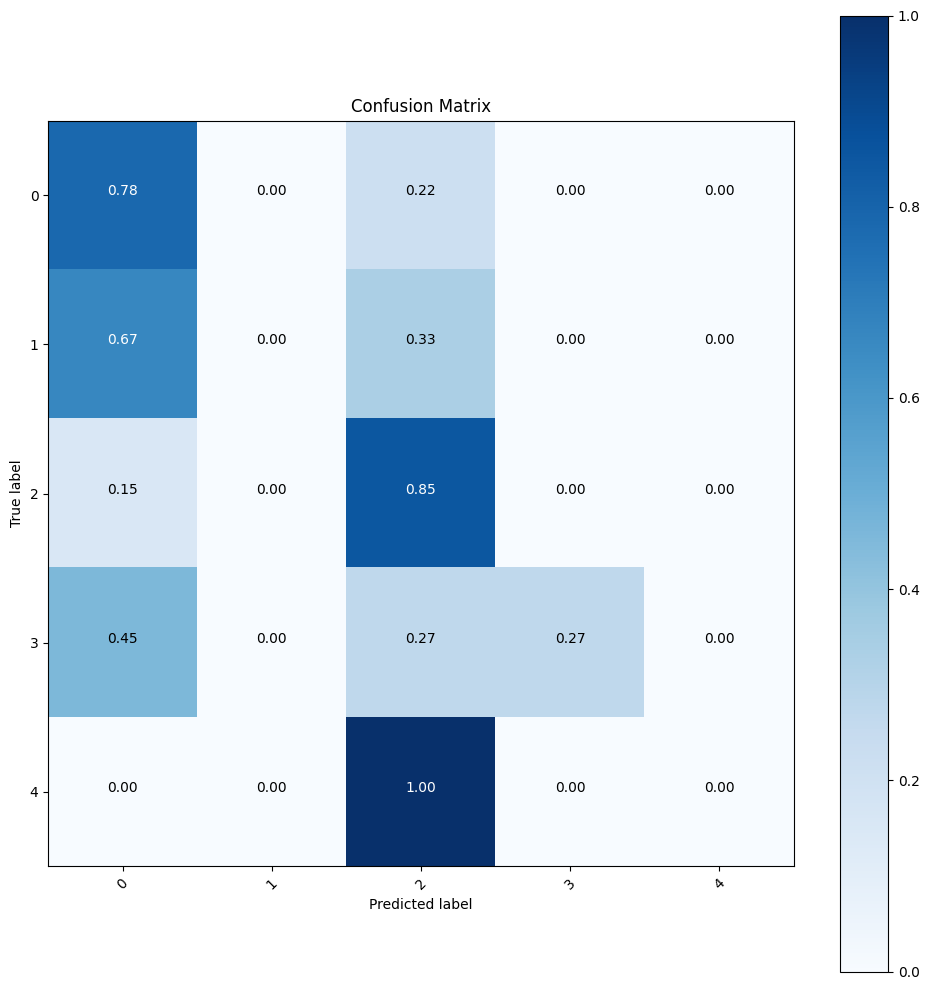

In [173]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(cm, [i for i in range(5)] ,title='Confusion Matrix', normalize=True)

In [174]:
y_predict_test

array([2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 3, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 3, 0, 0, 2, 3, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0])

In [175]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.58      0.78      0.67        23
           1       0.00      0.00      0.00         3
           2       0.77      0.85      0.81        40
           3       1.00      0.27      0.43        11
           6       0.00      0.00      0.00         1

    accuracy                           0.71        78
   macro avg       0.47      0.38      0.38        78
weighted avg       0.71      0.71      0.67        78



In [176]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

SVC()

Normalized confusion matrix


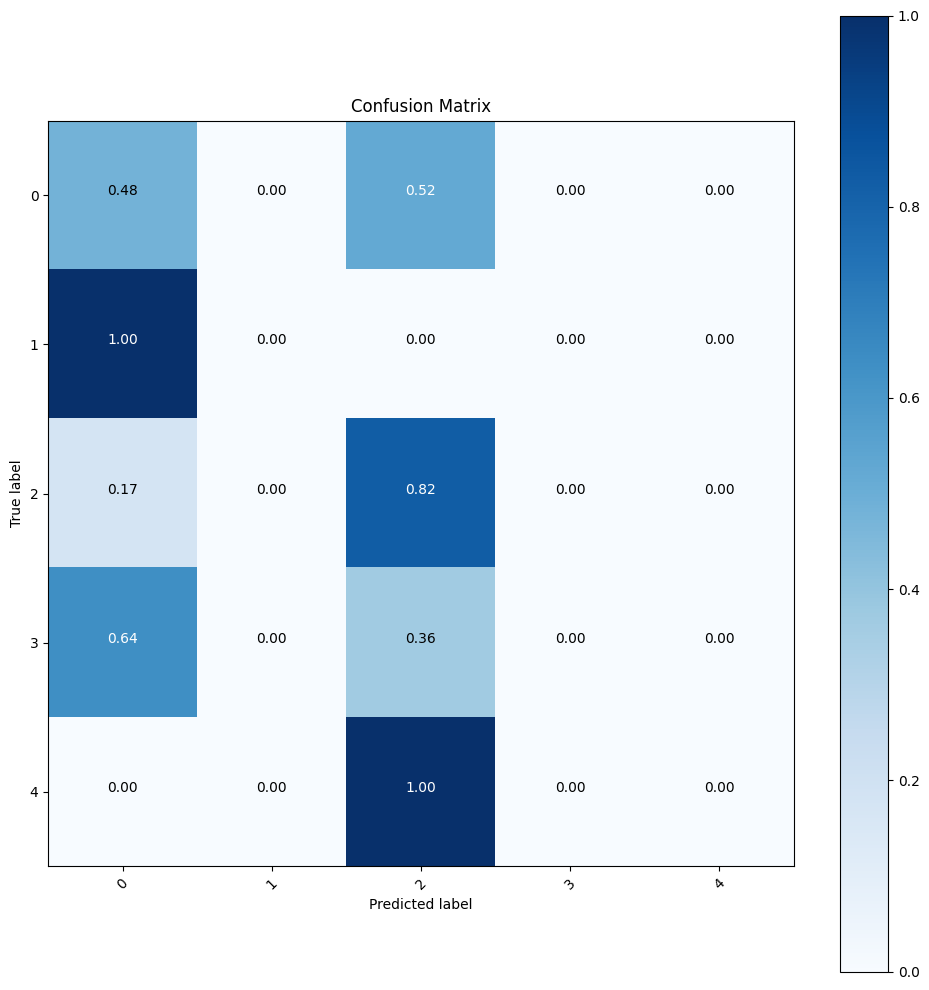

In [177]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(cm, [i for i in range(5)] ,title='Confusion Matrix', normalize=True)

In [178]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.39      0.48      0.43        23
           1       0.00      0.00      0.00         3
           2       0.66      0.82      0.73        40
           3       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         1

    accuracy                           0.56        78
   macro avg       0.21      0.26      0.23        78
weighted avg       0.45      0.56      0.50        78



In [179]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X_train_osm, y_train_osm = os.fit_resample(X_train, y_train)

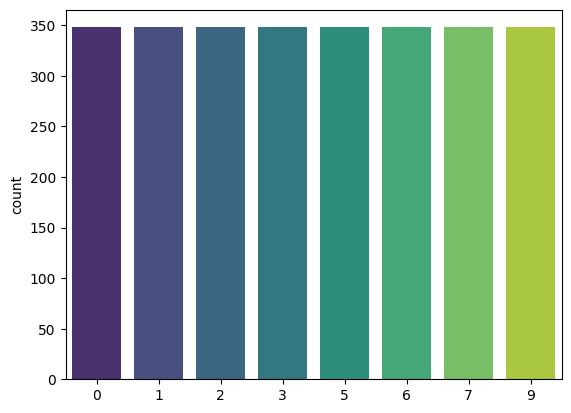

In [180]:
import seaborn as sns
sns.countplot(x=y_train_osm, palette="viridis")
plt.show()

In [181]:
from sklearn.naive_bayes import MultinomialNB


NB_classifier = MultinomialNB()
NB_classifier.fit(X_train_osm, y_train_osm)

MultinomialNB()

Normalized confusion matrix


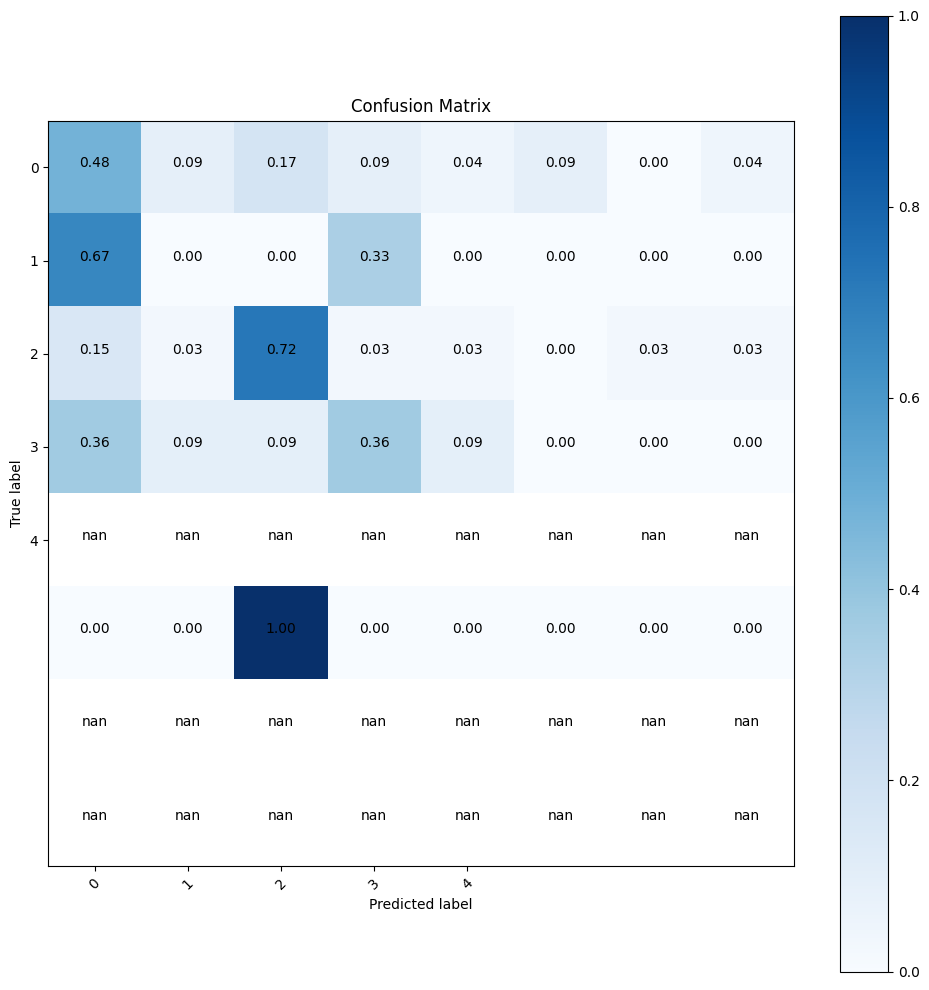

In [182]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(cm, [i for i in range(5)] ,title='Confusion Matrix', normalize=True)

In [183]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.48      0.48      0.48        23
           1       0.00      0.00      0.00         3
           2       0.83      0.72      0.77        40
           3       0.50      0.36      0.42        11
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.56        78
   macro avg       0.23      0.20      0.21        78
weighted avg       0.64      0.56      0.60        78

